In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")

In [3]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
df.tail()

,admit,gre,gpa,rank
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2
399,0,600,3.89,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [7]:
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


# Exploratory Data Analysis
Let's use seaborn to explore the data!
Try recreating the plots shown below!
Create a histogram of the gpa, gre and rank

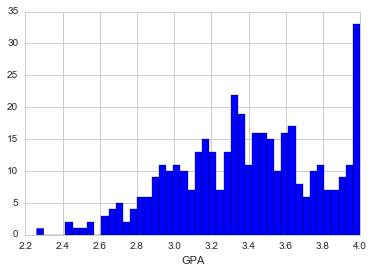

In [47]:
df['gpa'].hist(bins=45, color='blue')
plt.xlabel('GPA')

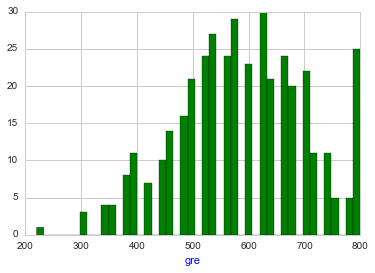

In [49]:
df['gre'].hist(bins=45, color='green')
plt.xlabel('gre', color = 'blue')

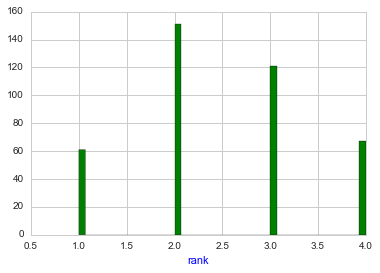

In [53]:
df['rank'].hist(bins=45, color='green')
plt.xlabel('rank', color = 'blue')

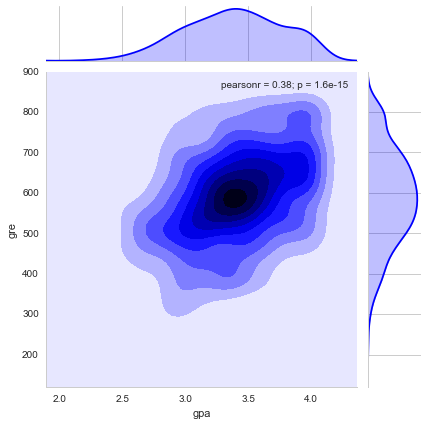

In [50]:
sns.jointplot(x='gpa',y='gre',data=df,color='blue',kind='kde');

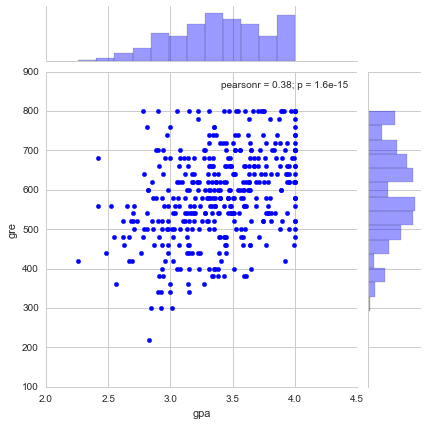

In [51]:
sns.jointplot(x='gpa',y='gre',data=df,color='blue')

In [54]:
# dummify rank

dummy_ranks = pd.get_dummies(df['rank'], prefix='rank')

dummy_ranks.head()

,rank_1,rank_2,rank_3,rank_4
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [10]:


# create a clean data frame for the regression

cols_to_keep = ['admit', 'gre', 'gpa']

# In our case we'll be predicting the admit column using gre, gpa, and the rank dummy variables
# rank_2, rank_3 and rank_4. We're going to treat rank_1 as our baseline and exclude it from
# our fit. This is done to prevent multicollinearity, or the dummy variable trap 
# caused by including a dummy variable for every single category.

data = df[cols_to_keep].join(dummy_ranks.ix[:, 'rank_2':])

data.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0.0,1.0,0.0
1,1,660,3.67,0.0,1.0,0.0
2,1,800,4.00,0.0,0.0,0.0
3,1,640,3.19,0.0,0.0,1.0
4,0,520,2.93,0.0,0.0,1.0


# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [11]:
data.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0.0,1.0,0.0
1,1,660,3.67,0.0,1.0,0.0
2,1,800,4.00,0.0,0.0,0.0
3,1,640,3.19,0.0,0.0,1.0
4,0,520,2.93,0.0,0.0,1.0


In [13]:
from sklearn.cross_validation import train_test_split

In [61]:
X = data[['gre','gpa','rank_2','rank_3','rank_4']]
y = data['admit']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

** Train and fit a logistic regression model on the training set.**

In [16]:
from sklearn.linear_model import LogisticRegression

In [63]:
# instantiate your logistic regression model
model = LogisticRegression(C=1e10)

In [64]:
# fit your model
model.fit(X_train,y_train)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [19]:
prediction = model.predict(X_test)

** Create a classification report for the model.**

In [20]:
from sklearn.metrics import classification_report

In [65]:
print classification_report(y_test,prediction)

             precision    recall  f1-score   support

          0       0.69      0.89      0.78        82
          1       0.36      0.13      0.19        38

avg / total       0.58      0.65      0.59       120



In [ ]:
# what if we drop the rank columns?

In [55]:
X = data[['gre','gpa']]
y = data['admit']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
# There is no way to switch off regularization in scikit-learn, 
# but you can make it ineffective by setting the tuning parameter C to a large number.

In [57]:
model2 = LogisticRegression(C=1e10)

In [58]:
model2.fit(X_train,y_train)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [59]:
prediction2 = model2.predict(X_test)

In [60]:
print classification_report(y_test,prediction2)

             precision    recall  f1-score   support

          0       0.69      0.93      0.79        82
          1       0.40      0.11      0.17        38

avg / total       0.60      0.67      0.59       120

